# speech emotion classification


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

#### File naming convention
Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:
<br>
##### Filename identifiers
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
<br>
- Vocal channel (01 = speech, 02 = song).
<br>
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
<br>
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
<br>
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
<br>
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
<br>
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
<br>

##### Filename example: 03-01-06-01-02-01-12.wav
- Audio-only (03)
<br>
- Speech (01)
<br>
- Fearful (06)
<br>
- Normal intensity (01)
<br>
- Statement "dogs" (02)
<br>
- 1st Repetition (01)
<br>
- 12th Actor (12) Female, as the actor ID number is even.

## Emotion labels
01 = neutral
<br>
02 = calm
<br>
03 = happy
<br>
04 = sad 
<br>
05 = angry 
<br>
06 = fearful
<br>
07 = disgust
<br>
08 = surprised

## Data usage
in this notebook we will use the following elements:
- Modality (03 = audio-only)
<br>
- Vocal channel (01 = speech)
<br>
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
<br>
- Emotional intensity (01 = normal, 02 = strong)
<br>
- Statement (01 = "Kids are talking by the door")
<br>
- Repetition (01 = 1st repetition)
<br>
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

## step 1: Open RAVDESS dataset & explore structure of wave samples
##### requirements:
- Download Ravdess-RawData
- Replace my_path with your own path

In [3]:
my_path = '/home/prakriti/College/FYP/Project/Emotively/model prop/speech-emotion-classification/RAVDESS-RawData-20220427T083419Z-001/RAVDESS-RawData'

In [4]:
import os
my_data = os.listdir(my_path)
print("this is the len of our data: ", len(my_data))
print("this is an example of a wave file:", my_data[50])
print("this index position represents the emotion label:", my_data[50][6:8])

this is the len of our data:  1440
this is an example of a wave file: 03-01-08-02-02-02-08.wav
this index position represents the emotion label: 08


## step 2: Load audio file and visualize its waveform (using librosa)

In [5]:
data, sampling_rate = librosa.load(my_path+'/03-01-01-01-02-01-03.wav')

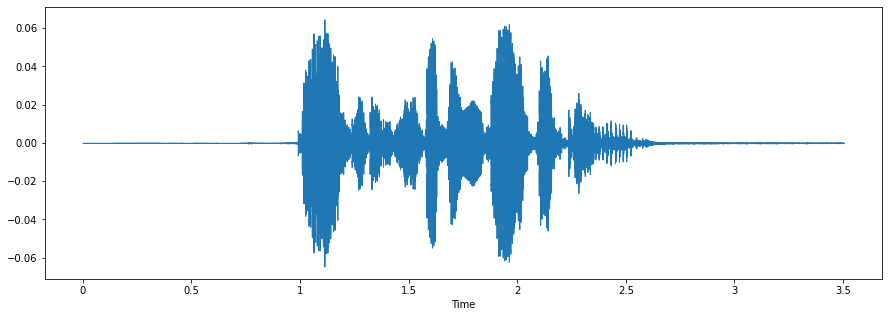

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

## Step 3: Convert the audio waveform

### Mel-frequency cepstral coefficients (MFCC) extraction
function returns:
- features
<br>
- labels

In [7]:
import scipy.io.wavfile
import numpy as np

emotions_num = ["Neutral-01","Calm-02","Happy-03","Sad-04","Angry-05","Fearful-06","Disgust-07","Surprised-08"]
actors = ["01","02","03","04","05","06","07","08","09","10","11","12",
         "13","14","15","16","17","18","19","20","21","22","23","24"]

number_of_mfcc_features = 49

def mfcc_extraction(path, modal_vocal, emotions_num, actors):
    labels = []
    mean_features = []
    std_features = []
    var_features = []
    min_features = []
    max_features = []
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-01-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-01-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-02-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-02-"+actor+".wav", sr=44100)
            mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
            std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
            mean_features.append(mean_mfccs)
            std_features.append(std_mfccs)
            var_features.append(var_mfccs)
            min_features.append(min_mfccs)
            max_features.append(max_mfccs)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-01-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-01-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-02-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                x, sr = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-02-"+actor+".wav", sr=44100)
                mean_mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0) 
                std_mfccs = np.std(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                var_mfccs = np.var(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                min_mfccs = np.amin(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
                max_mfccs = np.amax(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=number_of_mfcc_features).T,axis=0)
            
                mean_features.append(mean_mfccs)
                std_features.append(std_mfccs)
                var_features.append(var_mfccs)
                min_features.append(min_mfccs)
                max_features.append(max_mfccs)
                
                labels.append(emotion_num[:-3])      

    return number_of_mfcc_features, mean_features, std_features, var_features, min_features, max_features, labels


mfcc_features_and_labels = mfcc_extraction(my_path,'/03-01-', emotions_num, actors)

#### In our function we are extracting 2(repetition)2(statement)2(emotional)8(emotions)24(actors)
#### 1440 examples

In [39]:
# exract features and labels from 
number_of_mfcc_features, mean_mfcc_features, std_mfcc_features, var_mfcc_features, min_features, max_features, mfcc_labels = mfcc_features_and_labels
print("len of examples:", len(mean_mfcc_features))
print("len of labels:", len(mfcc_labels))
print("number of mfcc features:", number_of_mfcc_features)
print("feature dimension:", mean_mfcc_features[0].ndim)
print("feature shape:", mean_mfcc_features[0].shape)
print()
mfcc_labels = np.array(mfcc_labels)
print(mean_mfcc_features[50],mfcc_labels[50])


len of examples: 1440
len of labels: 1440
number of mfcc features: 49
feature dimension: 1
feature shape: (49,)

[-5.7645172e+02  8.2724953e+01 -7.0817952e+00  5.2333407e+00
 -6.5716034e-01  1.0053834e+01 -4.9013152e+00 -4.2561822e+00
 -1.3788512e+01 -4.1176744e+00 -8.9798145e+00 -5.6229591e+00
  4.2134027e+00 -4.0063982e+00 -7.3035188e+00  2.4391019e-01
 -4.7414565e+00 -2.7031817e+00 -2.0541093e+00 -1.6875015e+00
 -4.1548905e+00 -2.5356383e+00 -3.1352317e+00 -5.1127276e+00
 -3.7744212e+00 -4.1981568e+00 -2.6579576e+00 -3.0239367e+00
 -5.0019107e+00 -2.8822901e+00 -2.2563875e+00 -3.2977862e+00
 -2.6482699e+00 -8.9440703e-01 -2.6724448e+00 -2.5126584e+00
 -8.3981407e-01 -8.5725057e-01 -4.4724017e-01  2.2521691e+00
  2.3508418e+00  1.9847670e+00  5.5257261e-01 -2.4194217e-01
 -2.8293090e+00 -3.9131041e+00 -1.2616698e+00  8.4937668e-01
  2.1435601e-01] Happy


In [10]:
mean_mfcc_features = np.array(mean_mfcc_features)
std_mfcc_features = np.array(std_mfcc_features)
var_mfcc_features = np.array(var_mfcc_features)
min_features = np.array(min_features)
max_features = np.array(max_features)

print(std_mfcc_features.shape)
print(mean_mfcc_features.shape)
print(var_mfcc_features.shape)
print(min_features.shape)
print(max_features.shape)

(1440, 49)
(1440, 49)
(1440, 49)
(1440, 49)
(1440, 49)


In [11]:
mfcc_features = np.concatenate((mean_mfcc_features,std_mfcc_features),axis = 1)
mfcc_features.shape

(1440, 98)

# Step 4: apply PCA
- plot and explore explained variance
- use explained variance in order to select the best N components

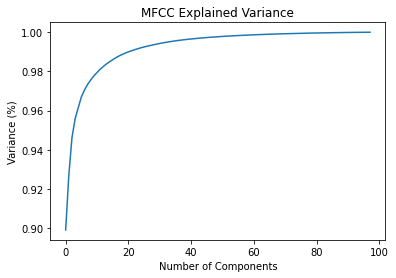

In [12]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA().fit(mfcc_features)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MFCC Explained Variance')
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=69)
mfcc_features = pca.fit_transform(mfcc_features)

In [13]:
mfcc_features.shape

(1440, 98)

# standardize

In [40]:
from sklearn.preprocessing import StandardScaler

data = mfcc_features
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(data)
print(mfcc_features)

[[-1.0392767   0.17802612  0.6734327  ... -1.7759216  -1.5591149
  -0.4720056 ]
 [-0.5842356   0.22004014 -0.02486327 ... -0.7029088  -0.54338145
  -0.31812394]
 [-0.31112382  0.61530155  0.24062808 ...  0.00288281  0.7750709
   2.125103  ]
 ...
 [ 0.5736633  -1.5173514  -0.77401984 ...  0.15932503  0.5029108
   0.53025436]
 [ 0.6518526  -0.9576893  -0.7234257  ... -0.8768509  -0.66549087
  -0.26163667]
 [ 0.757218   -1.5053033  -0.29608497 ... -1.1465832  -0.72738487
  -0.76369363]]


# Step 5 oversamle neutral in order to match our dataset

In [15]:
dictionary = {}
for i in mfcc_labels:
    dictionary[i] = dictionary.get(i,0) + 1

print(dictionary)

{'Neutral': 96, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
new_mfcc_features,  mfcc_labels = ros.fit_resample(mfcc_features,  mfcc_labels)

dictionary_2 = {}
for i in mfcc_labels:
    dictionary_2[i] = dictionary_2.get(i,0) + 1

print(dictionary_2)

{'Neutral': 192, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


## checkpoint

In [17]:
new_mfcc_features.shape

(1536, 98)

# step 6: Split data in Train, Val & Test
- features = stft_features
- labels = categorical_stft_labels

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfcc_features, mfcc_labels, test_size=0.30, 
                                                    random_state=42, stratify = mfcc_labels, shuffle= True)

# step 7: SVM model

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.631236442516269


# SVM model using Gridsearch

In [21]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','poly','rbf']}  

grid = GridSearchCV(SVC(), param_grid, cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [22]:

print(grid.best_params_) 
  

print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
print()
print(accuracy_score(y_test, grid_predictions)) 

              precision    recall  f1-score   support

       Angry       0.83      0.77      0.80        57
        Calm       0.96      0.89      0.93        57
     Disgust       0.69      0.76      0.72        58
     Fearful       0.79      0.78      0.78        58
       Happy       0.71      0.59      0.64        58
     Neutral       0.83      0.93      0.88        57
         Sad       0.70      0.76      0.73        58
   Surprised       0.81      0.83      0.82        58

    accuracy                           0.79       461
   macro avg       0.79      0.79      0.79       461
weighted avg       0.79      0.79      0.79       461

[[44  0  6  0  4  1  0  2]
 [ 0 51  0  0  0  2  4  0]
 [ 4  1 44  0  2  1  2  4]
 [ 1  0  1 45  4  1  5  1]
 [ 3  1  8  4 34  2  6  0]
 [ 0  0  2  2  0 53  0  0]
 [ 1  0  2  2  2  3 44  4]
 [ 0  0  1  4  2  1  2 48]]

0.7874186550976139


<AxesSubplot:>

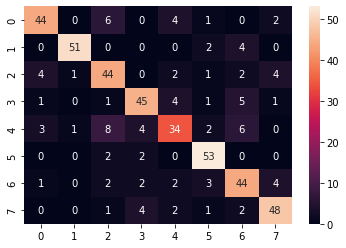

In [32]:
import seaborn as sns 
cf = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cf , annot = True)

In [25]:
y_pred=grid.predict(X_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy found through MLP Classifier is : {:.2f}%".format(accuracy*100))

Accuracy found through MLP Classifier is : 78.74%


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
model=MLPClassifier(alpha=0.1, 
                    batch_size=20, 
                    hidden_layer_sizes=(200,), 
                    learning_rate='adaptive', 
                    max_iter=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy found through MLP Classifier is : {:.2f}%".format(accuracy*100))

Accuracy found through MLP Classifier is : 69.20%


/home/prakriti/College/FYP/Project/Emotively/FYP-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
from sklearn.ensemble import RandomForestClassifier
randomForestclf = RandomForestClassifier(n_estimators = 100) 
randomForestclf.fit(X_train, y_train)
y_pred = randomForestclf.predict(X_test)
randomforestaccuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy found through Random Forest Classifier is : {:.2f}%".format(randomforestaccuracy*100))

Accuracy found through Random Forest Classifier is : 63.12%


In [29]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)
y_pred  = nbclassifier.predict(X_test)
nbclassifieraccuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy found through Naive Bayes Classifier is : {:.2f}%".format(nbclassifieraccuracy*100))

Accuracy found through Naive Bayes Classifier is : 38.83%


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred  = nbclassifier.predict(X_test)
KNeighborsClassifier=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy found through Naive Bayes Classifier is : {:.2f}%".format(KNeighborsClassifier*100))

Accuracy found through Naive Bayes Classifier is : 38.83%


In [31]:
import pickle
modelname = "speechemotionclassifier"
pickle.dump(grid,open(modelname,"wb"))